## Getting started

This notebook will require a new library, **scikit-learn**, which contains several useful functions for modeling and statistical analysis.

```conda install scikit-learn```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tables as tb
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

## Cartoon regression example

### Generate dummy data 

Here's a very simple dataset, where you record output $y$ while inputs $x_0$ and $x_1$ fluctuate randomly.  In this dataset, the value of $y$ depends on $x_0$ but not $x_1$.

In [65]:
X = np.random.randn(100,2)
y = X[:,0:1] + np.random.randn(100,1)/2

### Display it

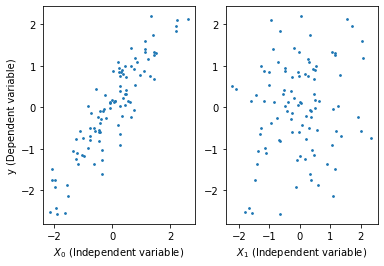

In [66]:
f,ax=plt.subplots(1,2)
ax[0].scatter(X[:,0],y,s=3)
ax[0].set_xlabel('$X_0$ (Independent variable)')
ax[0].set_ylabel('y (Dependent variable)')
ax[1].scatter(X[:,1],y,s=3)
ax[1].set_xlabel('$X_1$ (Independent variable)');

### Fit a line

In [67]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
slopes=regr.coef_
print("Slope for y vs. x0:", slopes[0][0])
print("Slope for y vs. x1:", slopes[0][1])


Slope for y vs. x0: 0.9897109990305512
Slope for y vs. x1: -0.031326598193191627


## Analyze binaural auditory data

### Load the data

In [ ]:
psth_a1 = np.loadtxt(open('data/por026c-a1_psth.csv'), delimiter=",")
stim_a1 = np.loadtxt(open('data/por026c-a1_stim.csv'), delimiter=",")
raster_a1= np.loadtxt(open('data/por026c-a1_raster.csv'), delimiter=",")
psth_b1=np.loadtxt(open('data/por026c-b1_psth.csv'), delimiter=",")
stim_b1=np.loadtxt(open('data/por026c-b1_stim.csv'), delimiter=",")
raster_b1=np.loadtxt(open('data/por026c-b1_raster.csv'), delimiter=",")

# compute average PSTH across trials and adjust from spikes/samples to spikes/sec
fs = 100  # samples/sec
recal_psth_a1=np.mean(raster_a1, axis=1) * fs
recal_psth_b1=np.mean(raster_b1, axis=1) * fs

### Exercise 1 - Create a PSTH plot to show the data for Neuron b1

In [ ]:
# Answer 
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,5))
ax[0].plot(stim_b1)
ax[1].plot(recal_psth_b1)

### Exercise 2 - Create a figure legend and labels for your axes

In [ ]:
t = np.arange(len(recal_psth_a1))/fs

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,5))

ax[0].plot(t,stim_b1)
ax[0].set_ylabel('Loudness')
ax[0].legend(('contra','ipsi'))
ax[1].plot(t,recal_psth_b1)
ax[1].set_ylabel('Spikes/sec')
ax[1].set_xlabel('Time (sec)')

### Exercise 3- Seperate the two stimulus plots to see which signal is likely causing the neuron a1 response

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,5))
ax[0].plot(t,stim_b1[:,0])
ax[0].plot(t,stim_b1[:,1]+0.2)
ax[0].legend(('contra','ipsi'))
ax[0].set_ylabel('fraction amplitude of 80dB')

ax[1].plot(t,recal_psth_b1)
ax[1].set_ylabel('Spikes/sec')
ax[1].set_xlabel('Time (sec)')

### Exercise 4 - Find the slopes for the scatterplot

`LinearRegression` fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
X_b1 = stim_b1
y_b1 = recal_psth_b1
regr_b1 = linear_model.LinearRegression()
regr_b1.fit(X_b1, y_b1)
slopes_b1=regr_b1.coef_
print(slopes_b1)

### Exercise 5 - Find the intercept of the scatterplot 

In [ ]:
intercept_b1 = regr_b1.intercept_
regr_b1.intercept_

### Exercise 6 - Create the scatterplots

In [ ]:
f,ax=plt.subplots(1,2)
x_b1=np.array([X_b1.min(),X_b1.max()])
ax[0].scatter(X_b1[:,0],recal_psth_b1,s=3)
ax[0].plot(x_b1,intercept_b1+x_b1*slopes_b1[0])
ax[0].set_title("Ipsi scatter plot")
ax[0].set_ylabel('Spikes/sec')
ax[0].set_xlabel('fraction amplitude of 80dB')
ax[1].scatter(X_b1[:,1],recal_psth_b1,s=3, color='orange')
ax[1].plot(x_b1,intercept_b1+x_b1*slopes_b1[1], color='orange')
ax[1].set_title("Contra scatter plot")
ax[1].set_ylabel('Spikes/sec')
ax[1].set_xlabel('fraction amplitude of 80dB')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


### Use prediction to measure variance explained

In [ ]:
T=stim_a1.shape[0]
delay=0
X = stim_b1[:(T-delay),:].copy()
y = recal_psth_b1[delay:].copy()
shuffle_channel=0
enable_shuffle=False
if enable_shuffle:
   X[:,shuffle_channel]=np.random.permutation(X[:,shuffle_channel])

y_pred_b1=regr_b1.predict(X)

f,ax = plt.subplots(2,1,figsize=(15,5))
ax[0].set_ylabel('fraction amplitude of 80dB')
ax[0].plot(t,X[:,0])
ax[0].plot(t,X[:,1]+0.2)

ax[1].set_ylabel('Spikes/sec')
ax[1].set_xlabel('Time (sec)')
ax[1].plot(t,y,label='actual')
ax[1].plot(t,y_pred_b1,label='predicted')
ax[1].legend()

from sklearn.metrics import explained_variance_score
r2=explained_variance_score(y, y_pred_b1)
print("variance explained:", r2)

### Exercise 7 - Create another PSTH plot to show the data for Neuron a1

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,5))
ax[0].plot(t,stim_a1[:,0])
ax[0].plot(t,stim_a1[:,1]+0.2)
ax[0].legend(('contra','ipsi'))
ax[0].set_ylabel('fraction amplitude of 80dB')
ax[1].plot(t,recal_psth_a1)
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Spike/sec')

### Exercise 8 - Cut down on the work and create a function for this processs

In [ ]:
def prediction_model(x, y, fs=100):

    X = x[:(T-delay),:].copy()
    Y = y[delay:].copy()
    shuffle_channel=0
    enable_shuffle=False
    if enable_shuffle:
       X[:,shuffle_channel]=np.random.permutation(X[:,shuffle_channel])
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    Y_pred=regr.predict(X)

    f,ax = plt.subplots(2,1,figsize=(15,5))
    t=np.arange(X.shape[0])/fs
    ax[0].plot(t,X[:,0])
    ax[0].plot(t,X[:,1]+0.2)
    ax[0].set_ylabel('fraction amplitude of 80dB')

    ax[1].plot(t,Y,label='actual')
    ax[1].plot(t,Y_pred,label='predicted')
    ax[1].set_ylabel('Spikes/sec')
    ax[1].set_xlabel('Time (sec)')
    ax[1].legend()
    from sklearn.metrics import explained_variance_score
    r2= explained_variance_score(Y, Y_pred)
    answer= print("Varience explained:",r2)
   
    return answer

### Exercise 9 - Show the prediction model for neuron a1

In [ ]:
prediction_model(stim_a1, recal_psth_a1)

### Exercise 10 - Create a function for the scatterplot creation process

In [ ]:
def scatter_plt(X,Y):
    """
    parameters:
       X - stimulus (independent variables)
       Y - response (dependent variable)
    """
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    regr.coef_
    
    f,ax=plt.subplots(1,2)
    intercept = regr.intercept_
    slopes = np.array(regr.coef_)
    x=np.array([X.min(),X.max()])
    ax[0].scatter(X[:,0],recal_psth_a1,s=3)
    ax[0].plot(x,intercept+x*slopes[0])
    ax[0].set_title("Ipsi scatter plot")
    ax[0].set_ylabel('Spikes/sec')
    ax[0].set_xlabel('fraction amplitude of 80dB')
    ax[1].scatter(X[:,1],recal_psth_a1,s=3, color='orange')
    ax[1].plot(x,intercept+x*slopes[1], color='orange')
    ax[1].set_title("Contra scatter plot")
    ax[1].set_ylabel('Spikes/sec')
    ax[1].set_xlabel('fraction amplitude of 80dB')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    
    return plt.show()

### Exercise 11 - Show the newly created scatterplots for neuron a1

In [ ]:
scatter_plt(stim_a1,recal_psth_a1)